In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic dataset
df = pd.read_csv("Titanic-Dataset.csv")   # or train.csv if from Kaggle

In [5]:
print(df.shape)        # Rows, Columns
print(df.info())       # Data types + missing values
print(df.describe())   # Summary stats (numeric only)
print(df.head())       # First 5 rows


(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


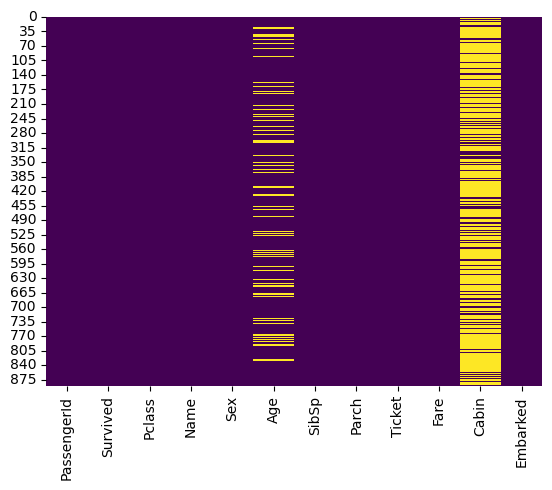

In [7]:
print(df.isnull().sum())
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.show()

In [9]:
# Fill 'Age' with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill 'Embarked' with most frequent
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop 'Cabin' (too many missing)
df = df.drop(columns=['Cabin'])


In [11]:
# Convert categorical columns to category type
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')


In [13]:
# Survival rate by gender
print(df.groupby("Sex")["Survived"].mean())

# Survival rate by class
print(df.groupby("Pclass")["Survived"].mean())

# Survival by embarkation port
print(df.groupby("Embarked")["Survived"].mean())


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64


C:\Users\SALEH MUHAMMAD\AppData\Local\Temp\ipykernel_3220\441809197.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby("Sex")["Survived"].mean())
C:\Users\SALEH MUHAMMAD\AppData\Local\Temp\ipykernel_3220\441809197.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby("Pclass")["Survived"].mean())
C:\Users\SALEH MUHAMMAD\AppData\Local\Temp\ipykernel_3220\441809197.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default a

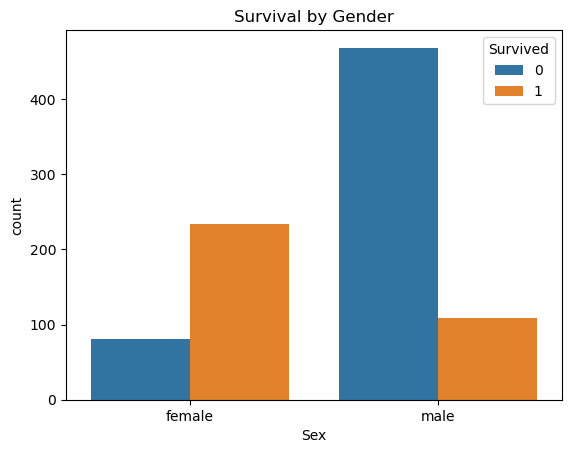

In [15]:
sns.countplot(x="Sex", hue="Survived", data=df)
plt.title("Survival by Gender")
plt.show()

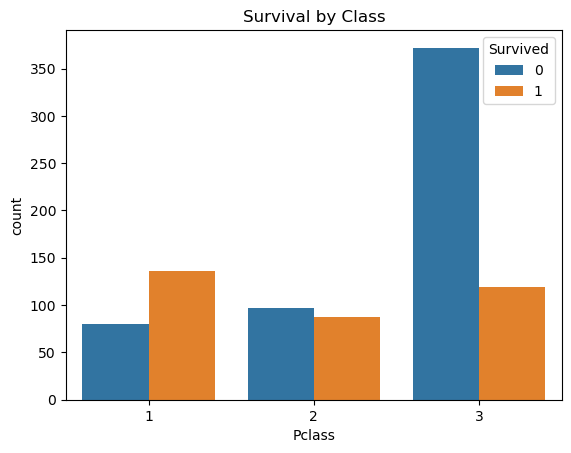

In [17]:
sns.countplot(x="Pclass", hue="Survived", data=df)
plt.title("Survival by Class")
plt.show()

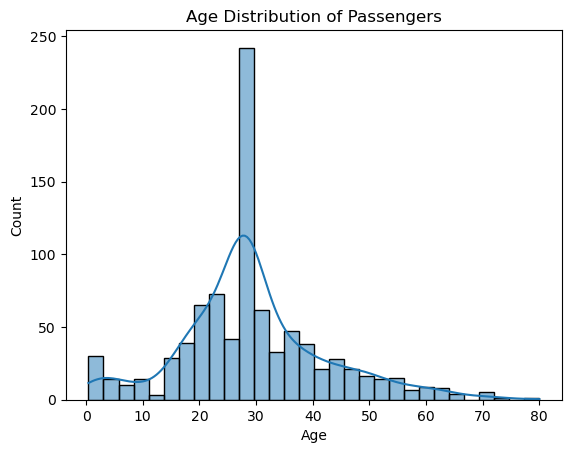

In [19]:
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution of Passengers")
plt.show()

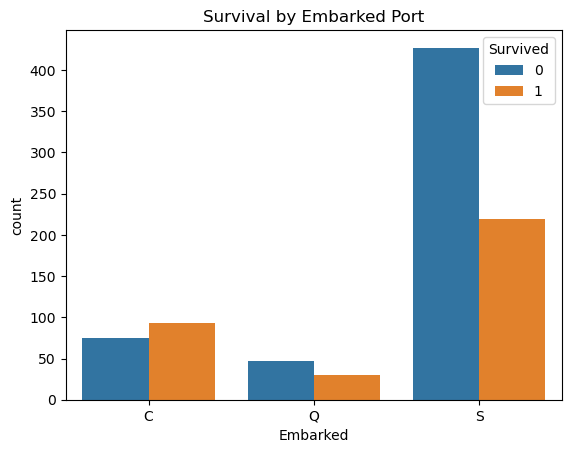

In [21]:
sns.countplot(x="Embarked", hue="Survived", data=df)
plt.title("Survival by Embarked Port")
plt.show()

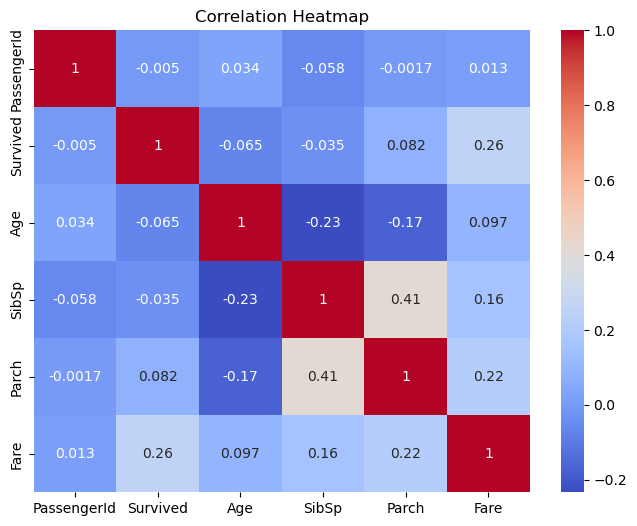

In [23]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

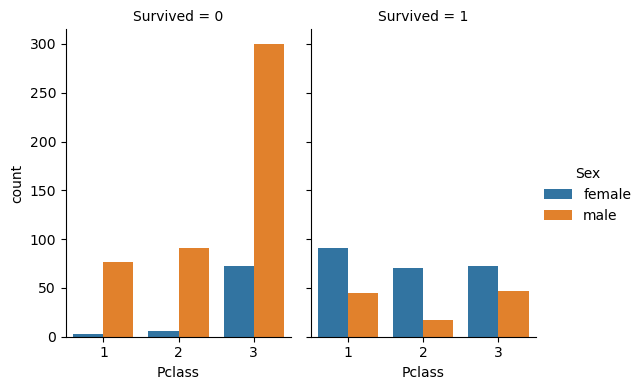

In [47]:
# Survival by gender & class together
sns.catplot(x="Pclass", hue="Sex", col="Survived",
            data=df, kind="count", height=4, aspect=0.7)
plt.show()